# Some Important Points: 🔋 


1.   V(max) = 4.2 volt
2.   V(min) = 2.8/2.7 Volt
3.   Nominal Charge capacity = 2500 mA/2.5Ah 
4.   SOC = Normal Capacity at that point/Nominal capacity
5.   Nominal Capacity - ammount of charged deliverd by fully charge batter, when it is fresh. OR **we can say Total capacity of battery.**
6.   SOH = Maximum of SOC at one cycle.
7.   we can find SOH by making set of loops in dataset and then find max(SOC).


In [73]:
print('hell')

hell


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#cols = ['Time(s)', 'Potential(V)','Current(A)','Charge(C)','A/Hour']
df = pd.read_csv("trial1.csv")
df

,Time/sec,Potential/V,Current/A,Charge/C,Capacity/Ah,Nominal_Capacity/Ah
0,0.4,3.54,1.25,0.00,0.00,2.5
1,1.0,3.54,1.25,0.95,0.00,2.5
2,2.0,3.54,1.25,2.28,0.00,2.5
3,3.0,3.55,1.25,3.46,0.00,2.5
4,4.0,3.55,1.25,4.64,0.00,2.5
...,...,...,...,...,...,...
242880,249963.2,4.20,0.20,8450.00,2.35,2.5
242881,249964.2,4.20,0.20,8450.00,2.35,2.5
242882,249965.2,4.20,0.20,8450.00,2.35,2.5
242883,249966.2,4.20,0.20,8450.00,2.35,2.5


In [4]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge','Capacity/Ah': 'Capacity',
                   'Nominal_Capacity/Ah': 'Nominal_Capacity'}, inplace=True)

In [5]:
df.shape   # checking the shape of dataset

(242885, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
dtypes: float64(6)
memory usage: 11.1 MB


In [7]:
df.isnull().count()    # for checking the Null values

Time                242885
Potential           242885
Current             242885
Charge              242885
Capacity            242885
Nominal_Capacity    242885
dtype: int64

# Insertion of Columns

In [8]:
display(df.iloc[1])

Time                1.00
Potential           3.54
Current             1.25
Charge              0.95
Capacity            0.00
Nominal_Capacity    2.50
Name: 1, dtype: float64

In [9]:
df.insert(loc = 6,column ='Energy',value=df['Capacity']*df["Potential"])

In [10]:
df.insert(loc = 7,column ='Power',value=df['Current']*df["Potential"])

In [11]:
df.insert(loc = 8,column ='SOC',value=df['Capacity']/df['Nominal_Capacity'])

In [12]:
df.insert(loc = 9,column ='SOC_perc',value=df['SOC'] * 100)

In [13]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,Energy,Power,SOC,SOC_perc
0,0.4,3.54,1.25,0.00,0.0,2.5,0.0,4.4250,0.0,0.0
1,1.0,3.54,1.25,0.95,0.0,2.5,0.0,4.4250,0.0,0.0
2,2.0,3.54,1.25,2.28,0.0,2.5,0.0,4.4250,0.0,0.0
3,3.0,3.55,1.25,3.46,0.0,2.5,0.0,4.4375,0.0,0.0
4,4.0,3.55,1.25,4.64,0.0,2.5,0.0,4.4375,0.0,0.0


In [14]:
df.describe()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,Energy,Power,SOC,SOC_perc
count,242885.000000,242885.000000,242885.000000,242885.000000,242885.000000,242885.0,242885.000000,242885.000000,242885.000000,242885.000000
mean,124950.840426,3.839404,0.034547,5083.012369,1.412284,2.5,5.702908,0.394564,0.564913,56.491349
std,72231.050997,0.385144,1.234725,3185.178306,0.884470,0.0,3.763641,4.354979,0.353788,35.378782
min,0.400000,2.750000,-2.500000,0.000000,0.000000,2.5,0.000000,-9.650000,0.000000,0.000000
25%,62490.800000,3.440000,0.000000,1920.000000,0.530000,2.5,1.895000,0.000000,0.212000,21.200000
50%,124983.000000,3.940000,0.080000,5790.000000,1.610000,2.5,6.181200,0.336000,0.644000,64.400000
75%,187475.100000,4.200000,1.250000,8280.000000,2.300000,2.5,9.660000,4.662500,0.920000,92.000000
max,249967.200000,4.200000,1.260000,8680.000000,2.410000,2.5,10.122000,5.292000,0.964000,96.400000


In [15]:
print(f"The SOC of battery is {df.iloc[4444][9]}% \nFor the values of: \n{df.iloc[4444]}")

The SOC of battery is 61.6% 
For the values of: 
Time                4444.0000
Potential              4.0700
Current                1.2500
Charge              5560.0000
Capacity               1.5400
Nominal_Capacity       2.5000
Energy                 6.2678
Power                  5.0875
SOC                    0.6160
SOC_perc              61.6000
Name: 4444, dtype: float64


# Function for getting the SOC(state of Charge) %

In [16]:
def show_soc(row, soc_column):
  print(f"The SOC of battery is {df.iloc[row][soc_column]}% \nFor the values of: \n{df.iloc[row]}")

In [17]:
show_soc(11900,9)

The SOC of battery is 92.4% 
For the values of: 
Time                11900.0000
Potential               4.1900
Current                 0.0000
Charge               8310.0000
Capacity                2.3100
Nominal_Capacity        2.5000
Energy                  9.6789
Power                   0.0000
SOC                     0.9240
SOC_perc               92.4000
Name: 11900, dtype: float64


In [18]:
show_soc(7898,9)

The SOC of battery is 89.60000000000001% 
For the values of: 
Time                7898.000
Potential              4.200
Current                0.200
Charge              8050.000
Capacity               2.240
Nominal_Capacity       2.500
Energy                 9.408
Power                  0.840
SOC                    0.896
SOC_perc              89.600
Name: 7898, dtype: float64


# Visualization

Text(0, 0.5, 'SOC')

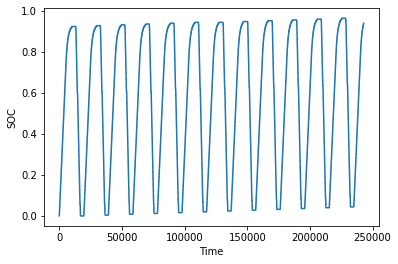

In [19]:
# SOC plot
plt.plot(df["SOC"], linestyle='solid')
plt.xlabel('Time')
plt.ylabel("SOC")

In [20]:
#sns.lineplot(x="Capacity/Ah", y="Potential/V",
   #          hue="Charge/C",
   #          data=df)

In [21]:
# SOC plot
#sns.lineplot(x="Power", y="Potential/V",
          #   hue="Charge/C",
          #   data=df)

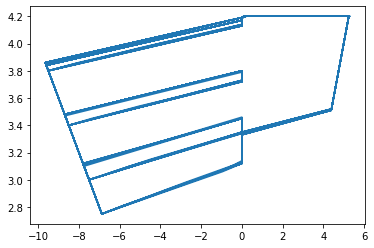

In [22]:
plt.plot(df["Power"],df['Potential'], linestyle='solid')

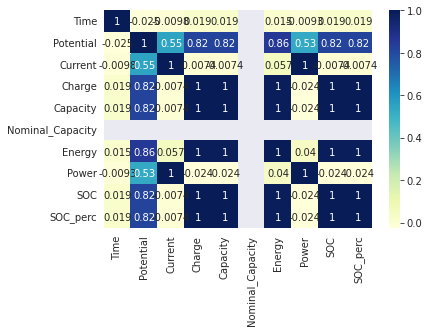

In [72]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

## Current Vs Voltage Vs Capacity

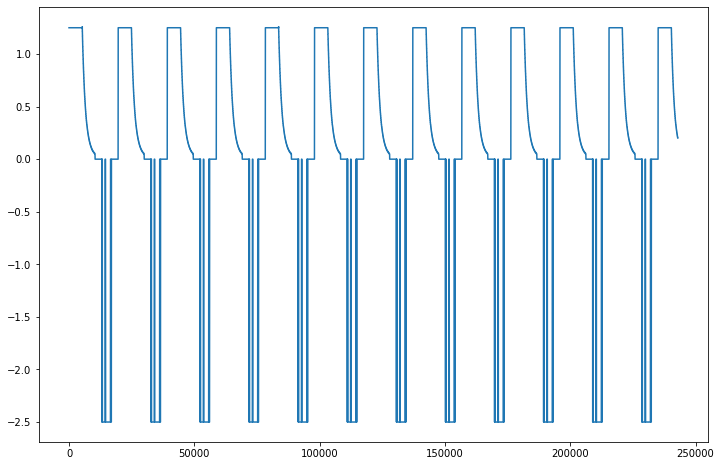

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(df["Current"])

Text(0.5, 1.0, 'Trial Dataset')

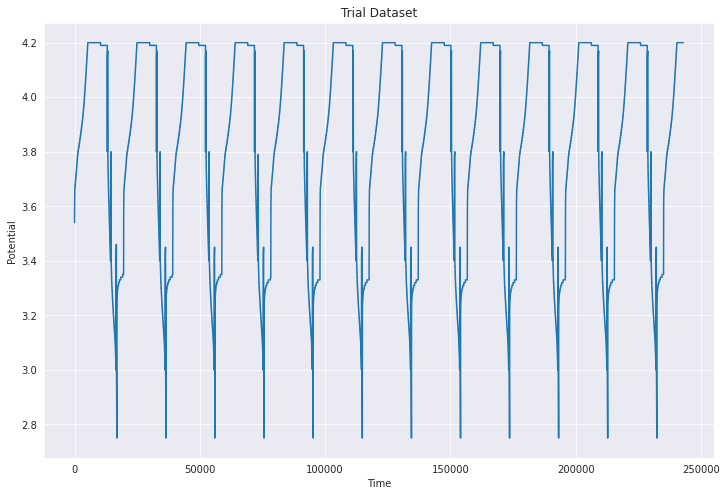

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Potential'])
#Draw threshold
#plt.plot([0.,len(capacity)], [1.4, 1.4])
plt.ylabel('Potential')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Trial Dataset')

Text(0.5, 1.0, 'Trial Dataset')

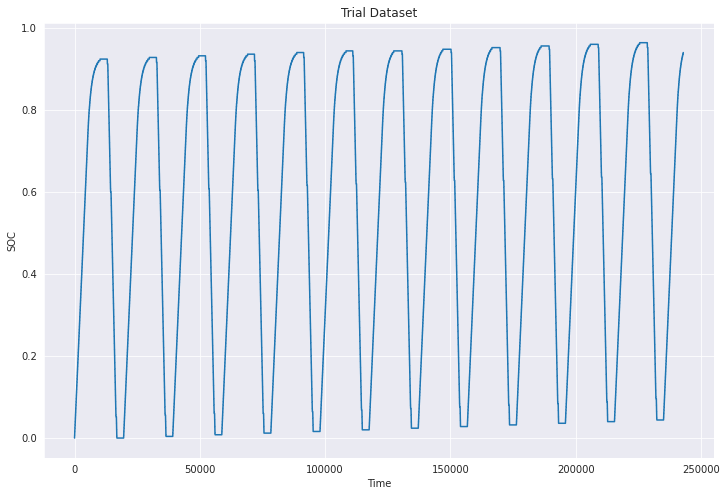

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['SOC'])
#Draw threshold
#plt.plot([0.,len(capacity)], [1.4, 1.4])
plt.ylabel('SOC')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Trial Dataset')

<ipython-input-26-3da3fbe8b87a>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes([0.05,0.05,1.9,1.2])


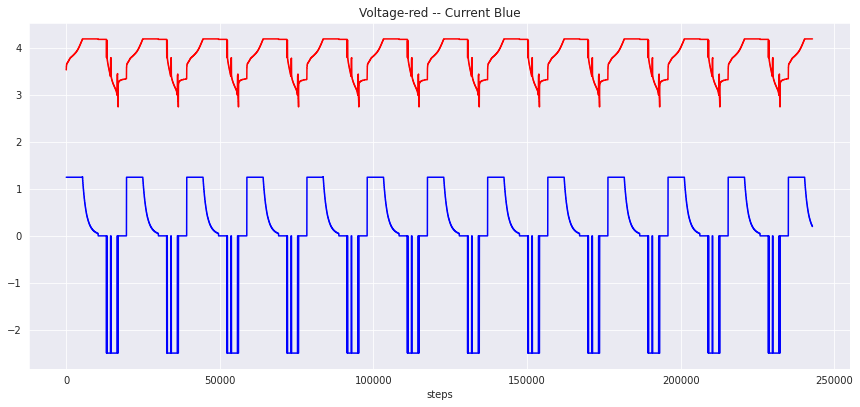

In [26]:
plt.axes([0.05,0.05,1.9,1.2])
plt.plot(df["Potential"],'r')
plt.xlabel('steps')
plt.title("Voltage-red -- Current Blue")
plt.axes([0.05,0.05,1.9,1.2])
plt.plot(df["Current"],'b')
plt.xlabel('steps')
plt.show()

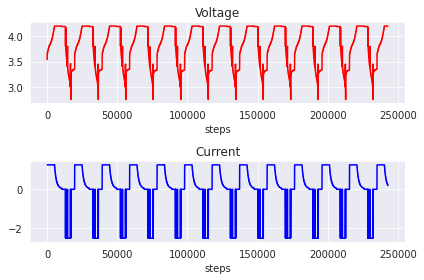

In [27]:
plt.subplot(2,1,1)
plt.plot(df["Potential"],'r')
plt.xlabel('steps')
plt.title("Voltage")
plt.subplot(2,1,2)
plt.plot(df["Current"],'b')
plt.xlabel('steps')
plt.title("Current")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Current Vs Capacity')

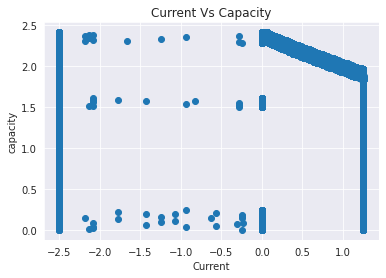

In [28]:
plt.scatter(df["Current"],df['Capacity'])
plt.xlabel("Current")  
plt.ylabel("capacity")
plt.title("Current Vs Capacity")  # Current vs Capacity

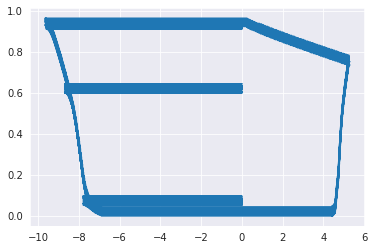

In [29]:
plt.plot(df["Power"],df['SOC'], linestyle='solid')

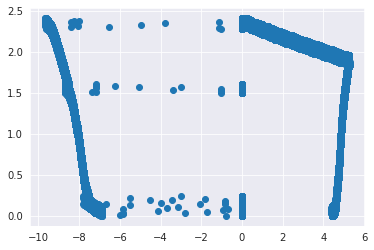

In [30]:
plt.scatter(df['Power'], df['Capacity'])

## Power

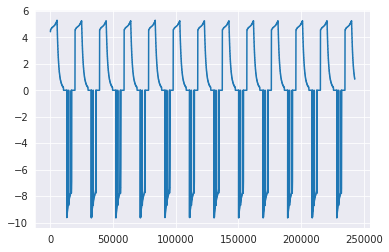

In [31]:
plt.plot(df['Power'],linestyle="solid")

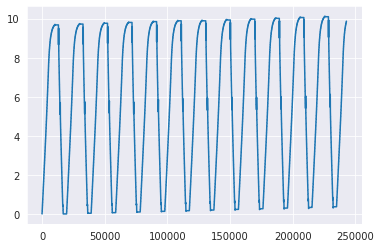

In [32]:
plt.plot(df['Energy'],linestyle="solid")

Text(0.5, 1.0, 'Capacity vs TIme')

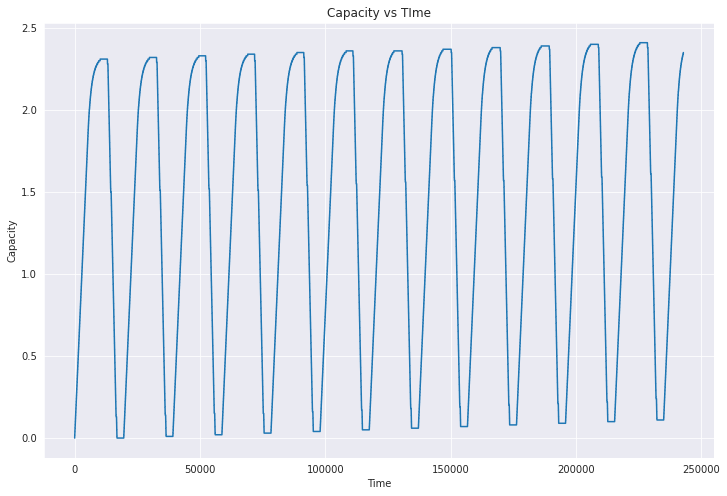

In [33]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Finding SOH

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
 6   Energy            242885 non-null  float64
 7   Power             242885 non-null  float64
 8   SOC               242885 non-null  float64
 9   SOC_perc          242885 non-null  float64
dtypes: float64(10)
memory usage: 18.5 MB


In [35]:
df["SOC"].max()

0.9640000000000001

In [36]:
df.SOC.quantile(0.95)

0.952

## Method 1 
Here what we did is that, first of all we took unique values of **capacity**. Then sorted into descending order. After this we devided this from **Nominal capacity** for the SOH.
We took Top 8 values from the list! (which is decreasing) 📉



*   This we can use to get the health that for what percentage we can use to check that battery is RIGHT FOR EV OR NOT.



In [37]:
c = df['Capacity'].unique()

In [38]:
c.sort()
print(c)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

In [39]:
Soh = c/2.5

In [40]:
print(Soh)

[0.    0.004 0.008 0.012 0.016 0.02  0.024 0.028 0.032 0.036 0.04  0.044
 0.048 0.052 0.056 0.06  0.064 0.068 0.072 0.076 0.08  0.084 0.088 0.092
 0.096 0.1   0.104 0.108 0.112 0.116 0.12  0.124 0.128 0.132 0.136 0.14
 0.144 0.148 0.152 0.156 0.16  0.164 0.168 0.172 0.176 0.18  0.184 0.188
 0.192 0.196 0.2   0.204 0.208 0.212 0.216 0.22  0.224 0.228 0.232 0.236
 0.24  0.244 0.248 0.252 0.256 0.26  0.264 0.268 0.272 0.276 0.28  0.284
 0.288 0.292 0.296 0.3   0.304 0.308 0.312 0.316 0.32  0.324 0.328 0.332
 0.336 0.34  0.344 0.348 0.352 0.356 0.36  0.364 0.368 0.372 0.376 0.38
 0.384 0.388 0.392 0.396 0.4   0.404 0.408 0.412 0.416 0.42  0.424 0.428
 0.432 0.436 0.44  0.444 0.448 0.452 0.456 0.46  0.464 0.468 0.472 0.476
 0.48  0.484 0.488 0.492 0.496 0.5   0.504 0.508 0.512 0.516 0.52  0.524
 0.528 0.532 0.536 0.54  0.544 0.548 0.552 0.556 0.56  0.564 0.568 0.572
 0.576 0.58  0.584 0.588 0.592 0.596 0.6   0.604 0.608 0.612 0.616 0.62
 0.624 0.628 0.632 0.636 0.64  0.644 0.648 0.652 0.656

In [41]:
Soh.shape

(242,)

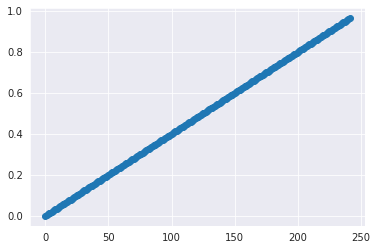

In [42]:
steps = np.arange(242)
plt.scatter(steps,Soh,linestyle='solid')

In [43]:
Soh.shape

(242,)

In [44]:
import math
print("Battery is decreasing with the rate of: ")
for i in range(238, 230, -1):
  print(f"SOH is {math.trunc(Soh[i]*100)} %")

Battery is decreasing with the rate of: 
SOH is 95 %
SOH is 94 %
SOH is 94 %
SOH is 94 %
SOH is 93 %
SOH is 93 %
SOH is 92 %
SOH is 92 %


In [45]:
# second option to do rouding 
import math
print("Battery is decreasing with the rate of: ")
for i in range(241, 232, -1):
  value = Soh[i]*100
  print(f"The SOH is",round(value,2),"%")

Battery is decreasing with the rate of: 
The SOH is 96.4 %
The SOH is 96.0 %
The SOH is 95.6 %
The SOH is 95.2 %
The SOH is 94.8 %
The SOH is 94.4 %
The SOH is 94.0 %
The SOH is 93.6 %
The SOH is 93.2 %


## Method 2

In [46]:
reverse_soh = np.sort(Soh)[241:232:-1]

In [47]:
soh_perc = reverse_soh*100
print(soh_perc)

[96.4 96.  95.6 95.2 94.8 94.4 94.  93.6 93.2]


In [48]:
import math
print("Battery is decreasing with the rate of: ")
for i in soh_perc:
  print(f"SOH is {round(i, 4)} %")

Battery is decreasing with the rate of: 
SOH is 96.4 %
SOH is 96.0 %
SOH is 95.6 %
SOH is 95.2 %
SOH is 94.8 %
SOH is 94.4 %
SOH is 94.0 %
SOH is 93.6 %
SOH is 93.2 %


Text(0, 0.5, 'SOH')

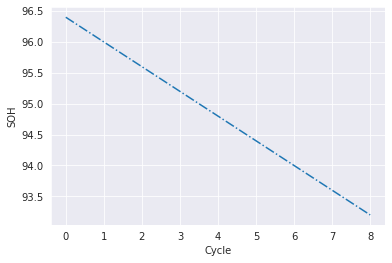

In [49]:
plt.plot(soh_perc,linestyle="dashdot")
plt.xlabel("Cycle")
plt.ylabel("SOH")

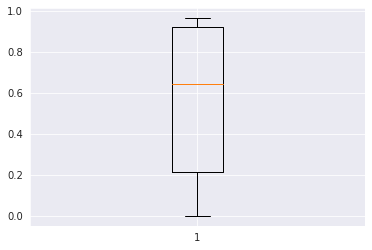

In [50]:
plt.boxplot(df['SOC'])
plt.show()

# Method too Calculate SOH

# Method to add cycle 

In [51]:
capacity = df['Capacity']
# C = capacity[0]

SOH = capacity/2.5   # (2.5 is Nominal Capacity)
print("Max of SOH :", np.max(SOH))
print("Min of SOH :",  np.min(SOH))

Max of SOH : 0.9640000000000001
Min of SOH : 0.0


In [52]:
# df.insert(loc = 10,column ='cycle',value=np.random.rand())

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
 6   Energy            242885 non-null  float64
 7   Power             242885 non-null  float64
 8   SOC               242885 non-null  float64
 9   SOC_perc          242885 non-null  float64
dtypes: float64(10)
memory usage: 18.5 MB


In [54]:
print(list(df.columns))

['Time', 'Potential', 'Current', 'Charge', 'Capacity', 'Nominal_Capacity', 'Energy', 'Power', 'SOC', 'SOC_perc']


In [55]:
# current_cycle = 1
# max = 1.25
# for i in df["Current/A"]:
#   while i == max:
#     df[cycle[i]] = current_cycle
#     i += 1
#   while df["Current/A"] < max:
#     df[cycle[i]] = current_cycle
#     i += 1
#   current_cycle = current_cycle+1

In [56]:
# # Method 2
# max = 1.25
# current_cycle= 1
# # for i in df["Current/A"]:
# #   while df["Current/A"] >= max:
# #     df[("cycle")][i] = current_cycle
# #     i = i+1
# #   while df["Current/A"][i] < max:
# #     df["cycle"][i] = current_cycle
# #     i = i+1
# #   current_cycle = current_cycle+1

# cycle = 1 
# max = 1.25
# Cycle=[]
# current = df["Current/A"]
# for i in range(len(current)):
#   condi = (df["Current/A"]!=1.25)
#   while df[condi][i] >= max:
#     Cycle.append(current_cyle)
#     i = i+1
#   while df[condi][i] < max:
#     Cycle.append(current_cycle)
#     i = i+1
#   current_cycle = current_cycle+1

In [57]:
# # Method 3
# cycle = 1 
# max = 1.25
# Cycle=[]
# current = df["Current/A"]
# for i in range(len(current)):
#   condi = (df["Current/A"]!=1.25)
#   if df[condi]!=max:
#     Cycle.append(cycle)
#   else :
#     while True:
#       Cycle.append(cycle)
#       if df["Current/A"] == max:
#         break

In [58]:
# df.describe()

In [59]:
# for i in df["cycle"]:
#   count=0
#   while i<=18683:
#     df["cycle"] = count+1

# Local Maxima and Minima of Capacity

Text(0.5, 1.0, 'Capacity vs TIme')

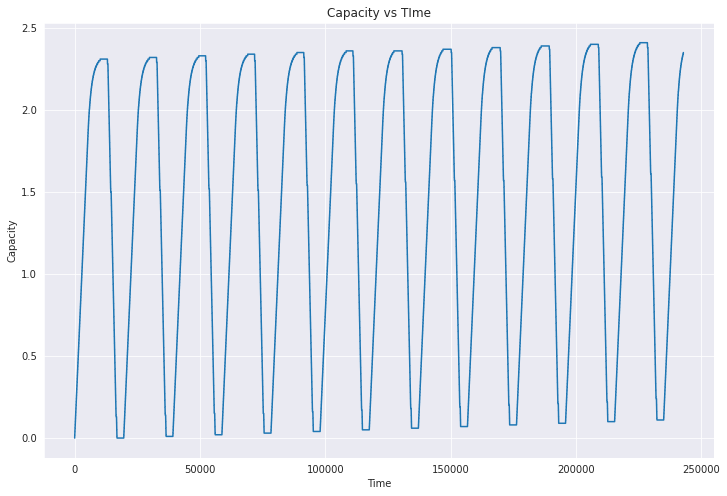

In [60]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

Text(0.5, 1.0, 'Local Maxima and Local Minima')

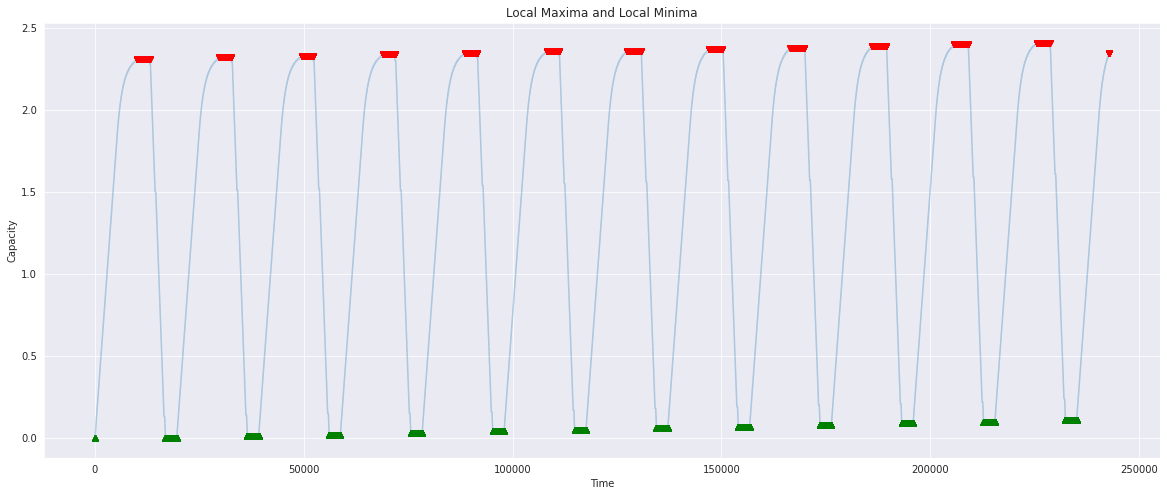

In [61]:
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=10000)[0]
ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=10000)[0]

df.Capacity.plot(figsize=(20,8), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')


In [62]:
# Indexes of Capacity where we are getting local minima
df["Capacity"][ilocs_min]

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
235024    0.11
235025    0.11
235026    0.11
235027    0.11
235028    0.11
Name: Capacity, Length: 32744, dtype: float64

In [63]:
# Indexes of Capacity where we are getting local maxima
df["Capacity"][ilocs_max]

10151     2.31
10152     2.31
10153     2.31
10154     2.31
10155     2.31
          ... 
242880    2.35
242881    2.35
242882    2.35
242883    2.35
242884    2.35
Name: Capacity, Length: 36164, dtype: float64

Text(0.5, 1.0, 'Maximum Capacity vs TIme')

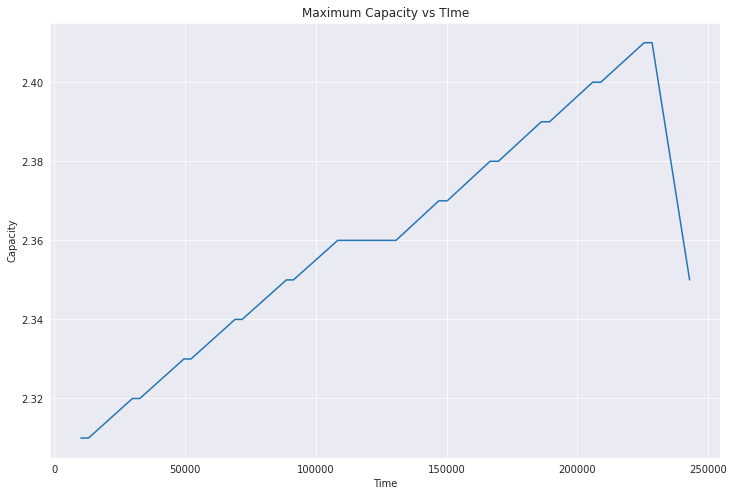

In [64]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df["Capacity"][ilocs_max])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Maximum Capacity vs TIme')

Text(0.5, 1.0, 'Minimum Capacity vs TIme')

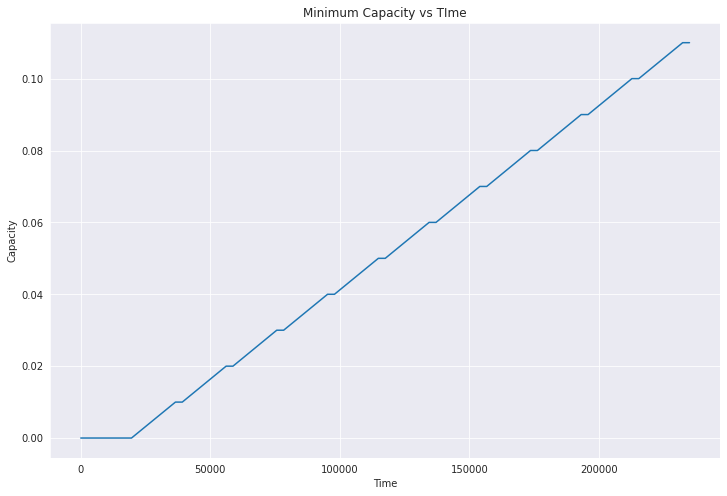

In [65]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df["Capacity"][ilocs_min])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Minimum Capacity vs TIme')

In [66]:
# These are the local Maxima and local Minimum of the Capacity
maximum_point = df['Capacity'][ilocs_max].unique()
minimum_point = df['Capacity'][ilocs_min].unique()

In [67]:
print(maximum_point)
print(minimum_point)

[2.31 2.32 2.33 2.34 2.35 2.36 2.37 2.38 2.39 2.4  2.41]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11]
